# Points of Dispense - Template min max distance
Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Optimization

Read in data from ...

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx') # need to update
bg_included = pd.read_csv('data/bg_pop_included.csv')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='site_id', values='Miles')
dist_time = distances.pivot(index='block_group', columns='site_id', values='TravelTime')

In [4]:
dist = dist_miles.values                     # can change to dist_time
N = population['POPULATION'].values
prop = bg_included['all_included'].values    # can change to random_included or other column

Create indices for block groups and PODs

In [5]:
blocks = range(len(N))
pods = range(len(dist[0]))

Initialize model for POD locations

In [6]:
m = gp.Model('POD_locations')

Using license file C:\Users\Elizabeth\gurobi.lic
Academic license - for non-commercial use only


Add decision variables x[i] for whether a POD is opened and y[i,j] for whether POD i serves block group j

In [7]:
x = m.addVars(pods, vtype=GRB.BINARY, name='x')
y = m.addVars(blocks, pods, vtype=GRB.BINARY, name='x')

Add auxiliary variable for maximum distance

In [8]:
z = m.addVar(vtype=GRB.CONTINUOUS, name='z')

Set up objective function to minimize total distance across the population

In [9]:
m.setObjective(z, GRB.MINIMIZE)

Constraint: y[i,j] can only be 1 if x[i] is also 1, meaning POD i is opened

In [10]:
m.addConstrs((y[j, i] <= x[i] for i in pods for j in blocks), name='y_if_x')

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

Constraint: each block group must be assigned one shelter

In [11]:
m.addConstrs((gp.quicksum(y[j, i] for i in pods) == 1
             for j in blocks), name='all_blocks_assigned')

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

Constraint: number of PODs opened must be ...

In [12]:
m.addConstr((gp.quicksum(x[i] for i in pods) <= 10), name='pods_opened')

<gurobi.Constr *Awaiting Model Update*>

Constraint: Capacity

In [13]:
# m.addConstrs((gp.quicksum(N[j] * x[i] * y[j, i] for j in blocks) <= 60000 
#               for i in pods), name='Capacity')

Constraint: maximum distance

In [14]:
m.addConstrs((z >= dist[j, i] * y[j, i] for i in pods for j in blocks), 
             name='Distance_Below_Max')

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

Optimize model

In [15]:
m.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (win64)
Optimize a model with 104501 rows, 51748 columns and 258547 nonzeros
Model fingerprint: 0x1f644705
Variable types: 1 continuous, 51747 integer (51747 binary)
Coefficient statistics:
  Matrix range     [8e-02, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.50s
Presolved: 104501 rows, 51748 columns, 258547 nonzeros
Variable types: 1 continuous, 51747 integer (51747 binary)
Found heuristic solution: objective 36.3382164
Found heuristic solution: objective 30.4291814
Found heuristic solution: objective 30.1723360

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxation: objective 7.133241e-01, 18746 iterations, 2.59 seconds
Total elapsed time = 7.96s

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntIn

### Analysis

Which block groups were assigned to which shelters?

In [16]:
block_pod_list = [[j, i] for i in pods for j in blocks if y[j, i].x==1]

In [17]:
block_pod_list # can export to view in a map

[[281, 8],
 [282, 8],
 [283, 8],
 [284, 8],
 [285, 8],
 [699, 8],
 [710, 8],
 [718, 8],
 [726, 8],
 [739, 8],
 [747, 8],
 [753, 8],
 [760, 8],
 [761, 8],
 [763, 8],
 [765, 8],
 [766, 8],
 [767, 8],
 [768, 8],
 [769, 8],
 [770, 8],
 [771, 8],
 [778, 8],
 [784, 8],
 [788, 8],
 [789, 8],
 [790, 8],
 [791, 8],
 [792, 8],
 [793, 8],
 [794, 8],
 [795, 8],
 [796, 8],
 [797, 8],
 [798, 8],
 [799, 8],
 [800, 8],
 [801, 8],
 [802, 8],
 [803, 8],
 [804, 8],
 [805, 8],
 [806, 8],
 [807, 8],
 [808, 8],
 [809, 8],
 [815, 8],
 [816, 8],
 [817, 8],
 [818, 8],
 [819, 8],
 [821, 8],
 [824, 8],
 [829, 8],
 [969, 8],
 [977, 8],
 [979, 8],
 [981, 8],
 [984, 8],
 [985, 8],
 [986, 8],
 [987, 8],
 [989, 8],
 [1083, 8],
 [1084, 8],
 [1085, 8],
 [247, 9],
 [459, 9],
 [461, 9],
 [468, 9],
 [469, 9],
 [470, 9],
 [471, 9],
 [472, 9],
 [476, 9],
 [477, 9],
 [478, 9],
 [479, 9],
 [480, 9],
 [481, 9],
 [482, 9],
 [483, 9],
 [484, 9],
 [485, 9],
 [487, 9],
 [488, 9],
 [489, 9],
 [490, 9],
 [491, 9],
 [492, 9],
 [493, 

In [18]:
dist_min_max = [N[j] * [dist[j,i]] for [j,i] in block_pod_list]
dist_min_max_flat = [item for sublist in dist_min_max for item in sublist]

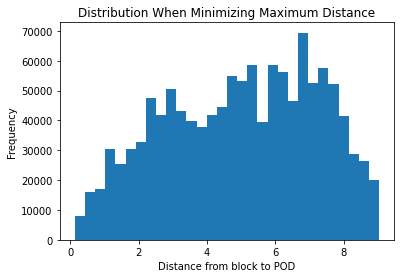

In [19]:
plt.hist(dist_min_max_flat, bins=30)
plt.title('Distribution When Minimizing Maximum Distance')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
plt.show()

In [20]:
capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [21]:
capacity_pod = {}
for [N, i] in capacity_pod_all:
    if i not in capacity_pod:
        capacity_pod[i] = N
    else:
        capacity_pod[i] += N

In [22]:
max(capacity_pod.values())

368385

In [23]:
min(capacity_pod.values())

26251

In [24]:
capacity_pod

{8: 74267,
 9: 91994,
 10: 26251,
 12: 84029,
 17: 26378,
 22: 311940,
 23: 115347,
 29: 368385,
 31: 89272,
 43: 35485}